<a href="https://colab.research.google.com/github/Pratikshakharode/EDA-Play-Store-App-Review-Analysiis/blob/main/(Group_Analysis)Play_Store_App_Review_Analysis_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# Import Pandas Package
# Import Numpy Package
# Import matplotlib
# Import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import mean,median
from itertools import count
from nltk.util import pr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Play Store Data csv file
file_path='/content/drive/MyDrive/project EDA Capstone-1/Play Store Data.csv'
df = pd.read_csv(file_path)

In [ ]:
# loading Reviews csv file
data_path='/content/drive/MyDrive/project EDA Capstone-1/User Reviews.csv'
review_path = pd.read_csv(data_path)

In [ ]:
# head :- head using the find out the top five rows
# show first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Using this data frame for all analysis
play_store_data_copy = df.copy()
play_store_data_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Find out the data type of each column 
play_store_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
type(play_store_data_copy)

pandas.core.frame.DataFrame

In [ ]:
#Find out the size of the play store data csv by using shape function
play_store_data_copy.shape

(10841, 13)

In [ ]:
# Here using columns and find out the columns name in play store data csv file.
# list of Columns in the datasets
list(play_store_data_copy.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
#Describe():- The describe() method computes and displays summary statistics for a Python dataframe.
play_store_data_copy.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Data Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reforming data,making corrections to data , and the combining of data sets to enrich data.Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset,table,or database and refers to identifying incomplete,incorrect,inaccurate,or relevant parts of the data and then replacing,modifying ,or deleting the dirty or coarse data.


Lets use the dropna() method to remove the columns that are 90% empty

In [ ]:
# Droping null values from the dataset
new_play_store_data_copy = play_store_data_copy.dropna()
new_play_store_data_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# So after cleaning our datasets we have 9360 columns and 13 rows
new_play_store_data_copy.shape

(9360, 13)

In [ ]:
# new_play_store_data_copy in dataframe is rating less than eual to five
new_play_store_data_copy [new_play_store_data_copy ['Rating']<=5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# find the null value in new_play_store_data_copy
new_play_store_data_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# check the maximum rating in new_play_store_data_copy
new_play_store_data_copy['Rating'].max()

5.0

Data Clean up - Correcting the data types
a. Which all variables need to be brought to numeric types?

Reviews

Installs

Price

b) Price Variable - remove $ Sign and convert to float

In [ ]:
new_play_store_data_copy["Price"] = new_play_store_data_copy['Price'].str.replace("$","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_play_store_data_copy = new_play_store_data_copy.astype({"Price" : float})

In [ ]:
# after removeing the $ Sign and convert to float
new_play_store_data_copy.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

c) Install - Remove ' , ' and ' + 'sign , convert to integer

In [ ]:
new_play_store_data_copy["Installs"] = new_play_store_data_copy['Installs'].str.replace(',' ," ").str.replace('+'," ").str.replace ('-' ," ").str.replace(' ',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
new_play_store_data_copy = new_play_store_data_copy.astype({"Installs": int})

In [ ]:
# after removeing the ' , ' and ' + 'sign convert into integer
new_play_store_data_copy.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

d) Convert all other identified columns to numeric

In [ ]:
# Convert all other identified columns to numeric
new_play_store_data_copy= new_play_store_data_copy.astype({"Reviews" : int})
new_play_store_data_copy["Last Updated"] = pd.to_datetime(new_play_store_data_copy["Last Updated"])

In [ ]:
# Converting all other identified columns to numeric
new_play_store_data_copy.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

Sanity Checks - Check for the following and handle accordingly
a. Avg Rating should be between 1 and 5 , as only these values are allowed on the play store

i) Are there any such record ? Drop if so.

In [ ]:
new_play_store_data_copy['Rating'].max()

5.0

In [ ]:
new_play_store_data_copy['Rating'].min()

1.0

The max value of rating is 5 and min is 1 so there no records which falls out of the range

b.Reviews should not be more than installs as only those who installed can reviews the app.

i) Are there any such records ? Drop if so

In [ ]:
ex = new_play_store_data_copy[new_play_store_data_copy["Reviews"] < new_play_store_data_copy["Installs"]]

In [ ]:
ex

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
# after Reviews should not be more than installs 
ex.shape

(9351, 13)

Indentify and Handled Outliers -

a. Price Column

i) Make suitable plot to identify outliers in price

In [ ]:
paid_apps = ex[ex['Price'] > 0]

In [ ]:
sns.set ( rc = {'figure.figsize' :(8,8)})

Text(0.5, 1.0, 'Price Distibution')

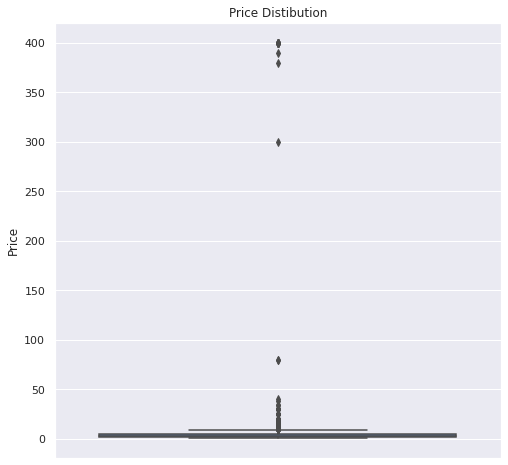

In [ ]:
g = sns.boxplot ( y =paid_apps["Price"])
plt.title("Price Distibution")

In [ ]:
# check the maximum reviews
ex["Reviews"].max()

78158306

In [ ]:
# check the minimum reviews
ex["Reviews"].min()

1

ii) Limit data to apps with < than one million Reviews

In [ ]:
# check the Limit data to apps with < than one million Reviews
outlier = ex[ex['Reviews'] <= 1000000]

In [ ]:
outlier 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
# maximum outlier in review
outlier['Reviews'].max()

995002

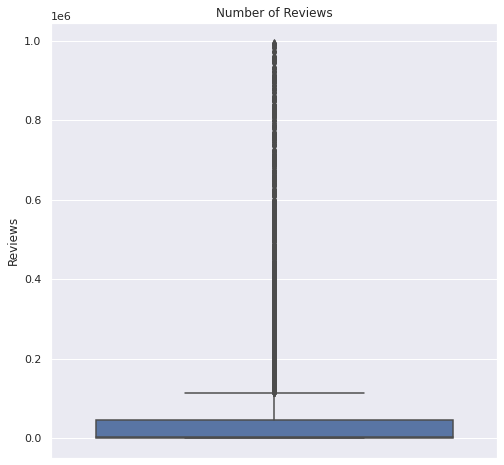

In [ ]:
#ploting box plot for outlier
g= sns.boxplot( y = outlier["Reviews"])
plt.title("Number of Reviews")
plt.show()

b. Installs

i) What is the 95th percentile of the installs ?

In [ ]:
 # 95th percentile of the installs 
limit = np.percentile(ex["Installs"],95)
limit

100000000.0

ii) Drop records having a values more than the 95th percentile

In [ ]:
# Drop records having a values more than the 95th percentile
outlier = ex[ex["Installs"] < limit]

In [ ]:
outlier['Installs'].max()

50000000

Data Analysis to answer bussiness Questions
1. What is the distribution of ratings like ? ( use seaborn ) more skewed towards higher or lower values ?



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


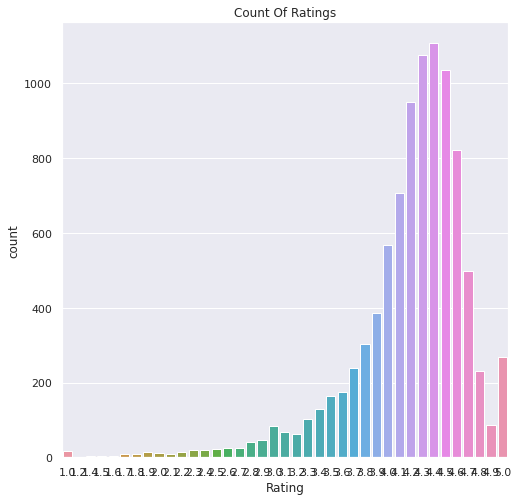

In [ ]:
g = sns.countplot(ex [ "Rating"])
sns.set( rc= { 'figure.figsize':(20,40)})
plt.title("Count Of Ratings")
plt.show()

a. How do you explain this ?
b.what is the implication of this on your analysis ?
most apps are rated between 4 and 5

there are very few apps which are rated less than 3

maximum number of the apps are rated 4.3 to 4.4

2.What are the top content rating values ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

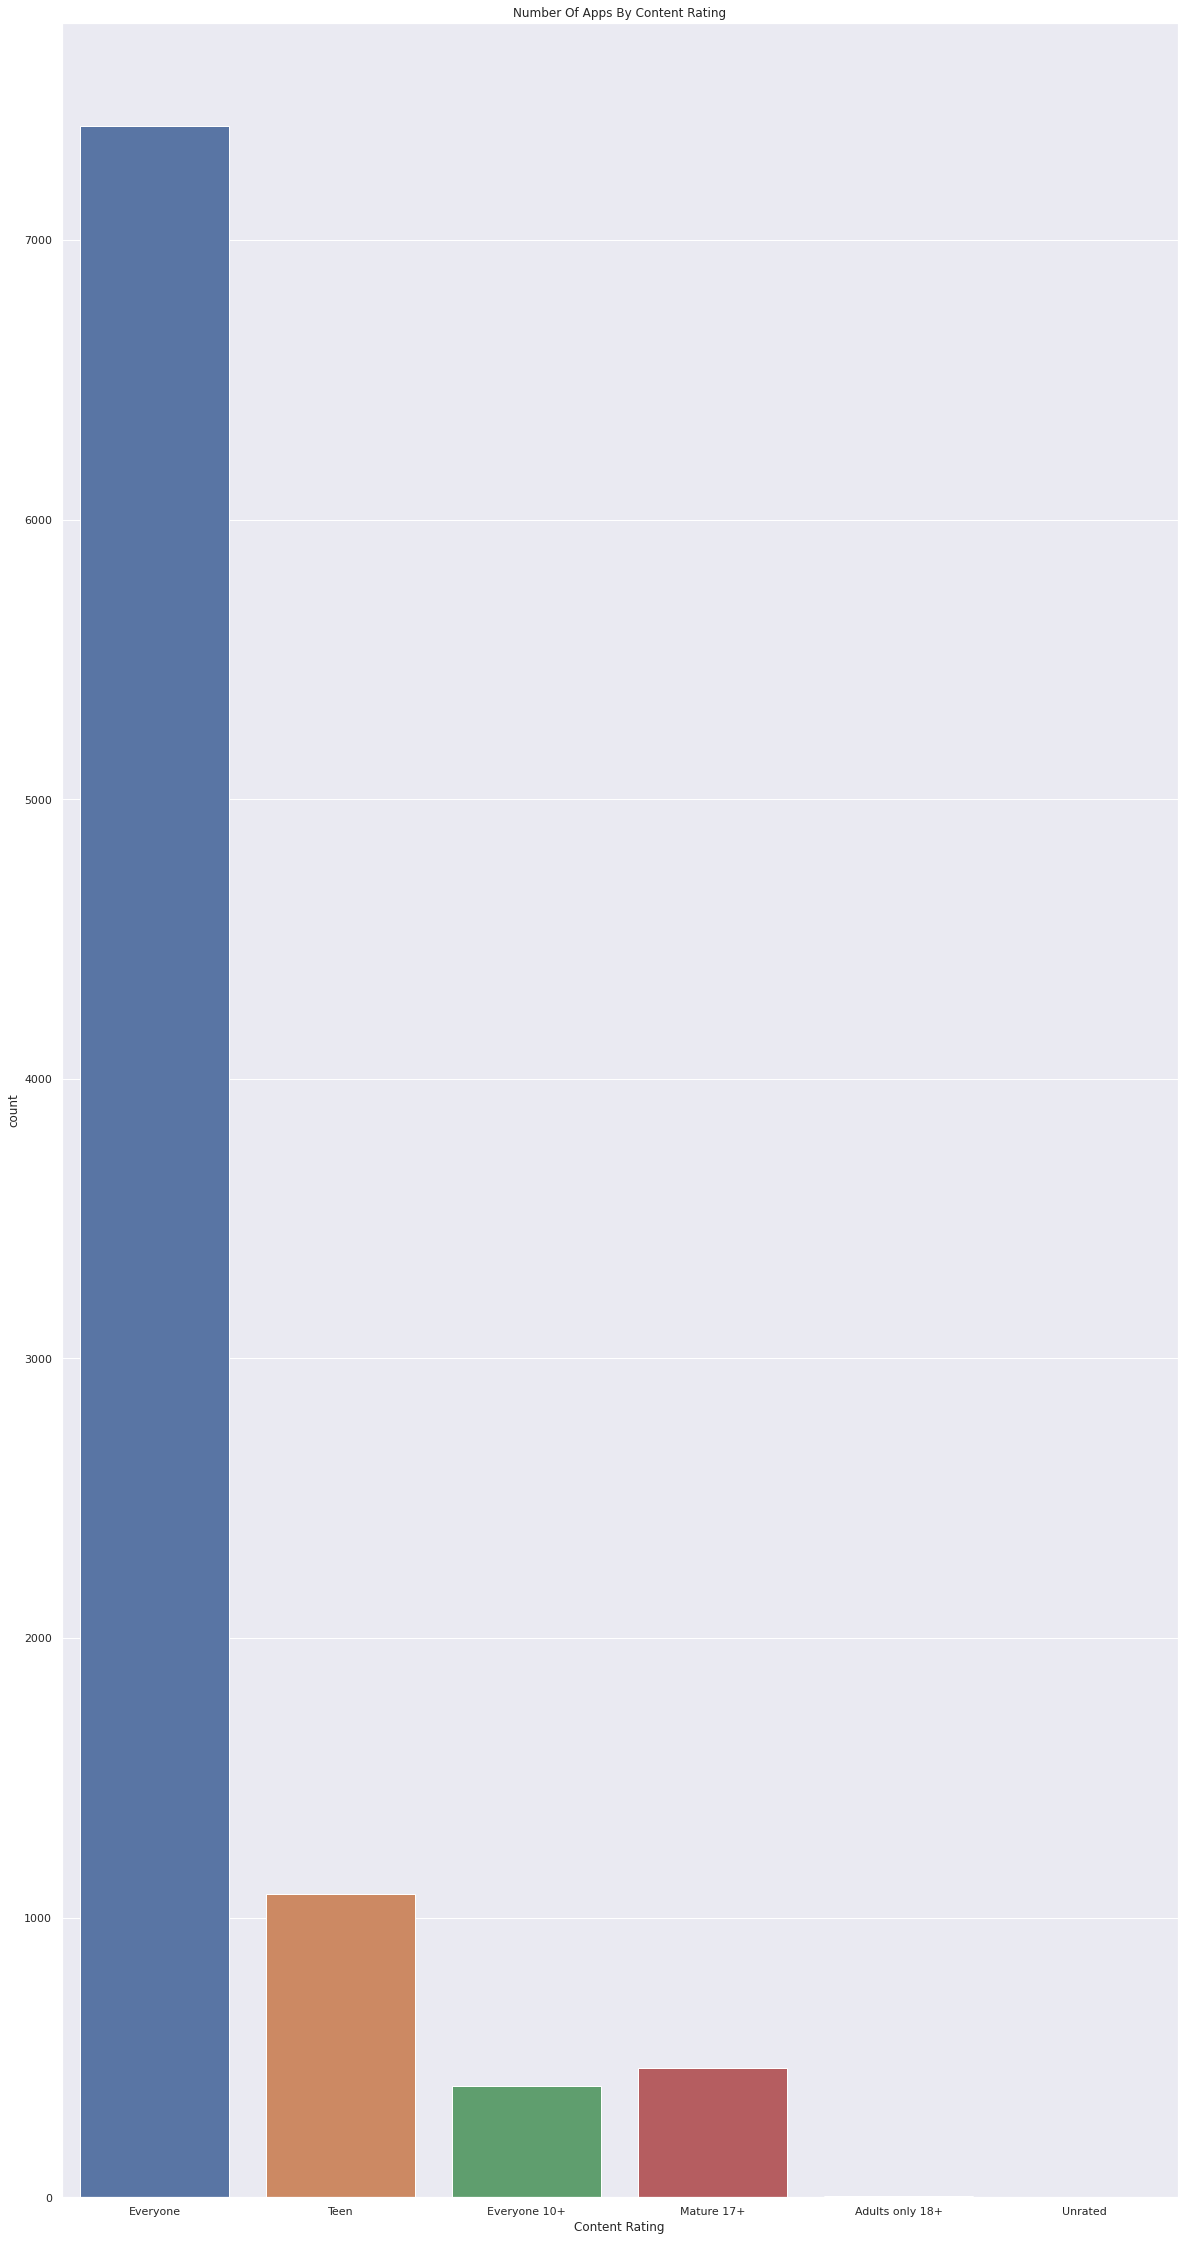

In [ ]:
g = sns.countplot (ex["Content Rating"])
plt.title ("Number Of Apps By Content Rating")
sns.set ( rc={'figure.figsize' : (15,10)})
plt.show

a. Are there any values with very few records ?

Yes "Adult only 18+" and " Unrated"

b. If yes,drop those as they won't help in the analysis

In [ ]:
# 'drop adult only 18+' in countplot ex
no_records = ex[ex["Content Rating"] != "Adults only 18+"]

In [ ]:
no_records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
# drop 'unrated' in countplot ex
no_records = no_records[no_records["Content Rating"] !="Unrated"]

In [ ]:
no_records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


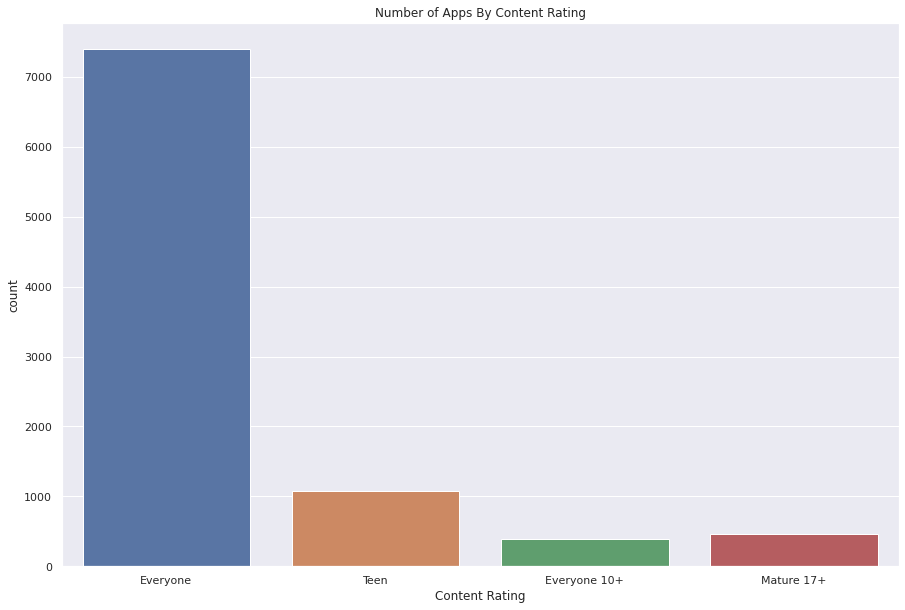

In [ ]:
# After drop the 'adult only 18+' and 'unrated'
g = sns.countplot(no_records["Content Rating"])
plt.title("Number of Apps By Content Rating")
sns.set( rc = {'figure.figsize': (15,10)})
plt.show()

In [ ]:
# First 5 rows of datasets
no_records.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
# Find out the unique values in column Type
no_records['Type'].unique()

array(['Free', 'Paid'], dtype=object)

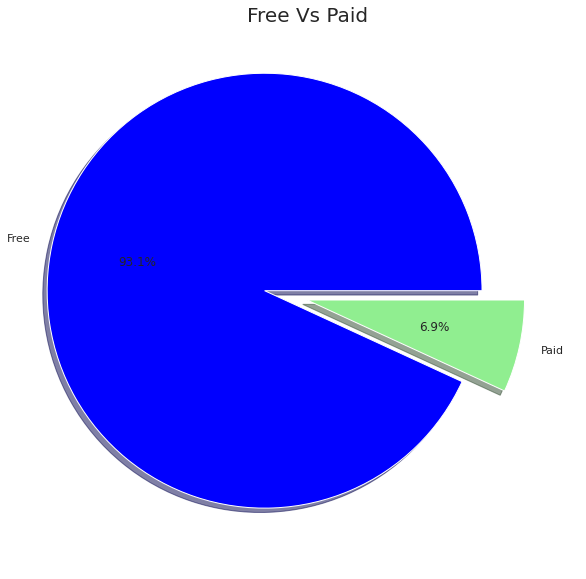

In [ ]:
# Enlarging the pie chart
plt.figure(figsize=(10,10))

# Assigning labels and sort the values and converting them to list 
labels = no_records['Type'].value_counts(sort = True).index

# Assigning sizes and sort the values
sizes = no_records['Type'].value_counts(sort = True)

colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Free Vs Paid',size = 20)
plt.show()

In [ ]:
# Unique values in Size column
no_records["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
# M= 1000000 , k= 1000
# M means 1000000 here i am using this becuase in size column some integer are present so it converted into float 
# k means 1000 here i am using this becuase in size column some integer are present so it converted into float 

def values_convert(x):
  if x[-1]== 'k':
    output=(float(x.replace('k','')))*1000
    return output
  if x[-1]== 'M':
    output=(float(x.replace('M','')))*1000000
    return output
  else:
    return None

In [ ]:
records = no_records.dropna()

In [ ]:
# check the Unique values in Size column
records["Size"].unique

<bound method Series.unique of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9347, dtype: object>

In [ ]:
records['Size'] =records['Size'].apply(lambda x: values_convert(x))

In [ ]:
records = records.dropna()

In [ ]:
records.shape

(7712, 13)

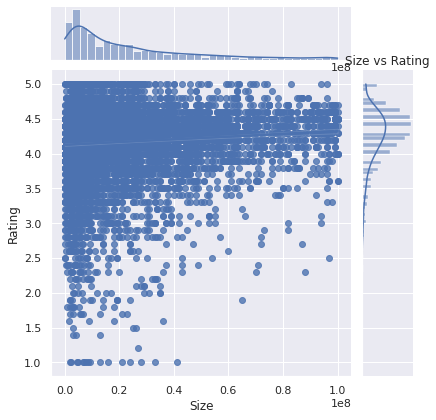

In [ ]:
# after jointplot of size and rating 
g = sns.jointplot( x="Size",y="Rating",kind ='reg',data=records)
plt.title( "Size vs Rating")
plt.show()

3. Effect of size on rating
a. make joinplot to understand the effect of size on rating

b. Do you see any patterns?

The apps of the lower size are rated distributively.They also contribute to the lowest rated apps of greater size are rated better as compared to the apps of small sizes.The frequency of the small apps is also way too high than the apps with large sizes. The maximum number of apps is around 20000 in size .

c.How do you explain the patterns ?

The regression lines shows an upward trend as the size of the app increses which shows that the apps with greater size provides a better expreience to the user

4.Effect of Price on Rating
a.Make a joinpoint (with regression line)

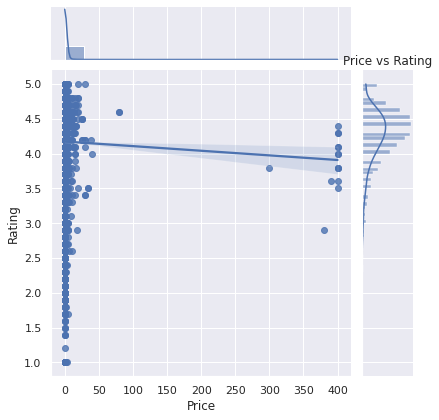

In [ ]:
#jointplot of price nd rating
sns.set(rc={'figure.figsize':(15,10)})
g=sns.jointplot(x=records["Price"],y=records["Rating"],kind="reg")
plt.title('Price vs Rating',y=1.3)
plt.show()

b) What pattern do you see ?

c) How do you explain the pattern ?

The regression lines shows an upward trend as the price goes up but there are very few apps with higher price but they are very good

d) Replot the data ,this time with only records with price > 0

In [ ]:
# find out the unique values in records
records['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [ ]:
# price greater than 0
record_paid = records[records['Price'] > 0] 

In [ ]:
# In record_paid dataframe find out the paid in Type column
record_paid = records[records['Type'] == 'Paid'] 
record_paid.shape

(575, 13)

In [ ]:
record_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000000.0,1000000,Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861000.0,100,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up


In [ ]:
# find out the unique values in price column
record_paid['Price'].unique()

array([  4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,   9.99,
         0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,  16.99,
        14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,  19.99,
        15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,   3.88,
       399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,
         1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99, 389.99,
         8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,  15.46,
         8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,   2.9 ,
         1.97,   2.56,   1.2 ])

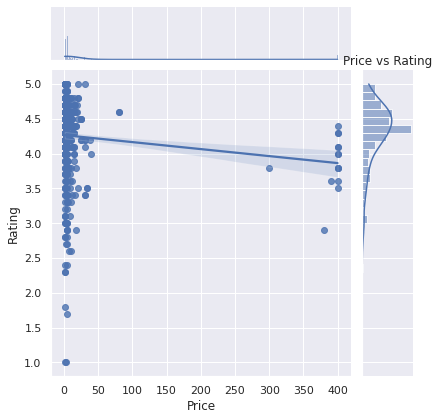

In [ ]:
# jointplot of price and rating
g = sns.jointplot( x = record_paid["Price"],y = record_paid["Rating"],kind = 'reg')
plt.title( "Price vs Rating", y= 1.3)
plt.show()

e. Does the pattern chnage ?

f. What is your overall inference on the effect of price on the rating

Yes, now the regression line shows a slight download trend when the price of the increases but this is not becuase the high priced apps are poorly rated rather becuase there are a very few high priced apps so we can see a slight downword trend in the regression line

5. Look at all the numeric interaction together -
a.Make a pairplot with the column - "Reviews" ,"Size", "Rating","Price"

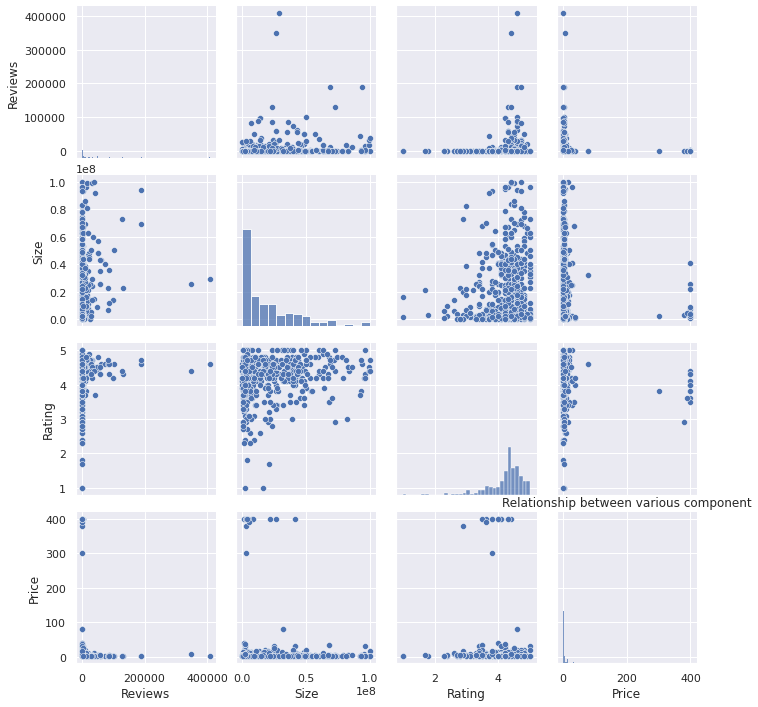

In [ ]:
# pairplot of reviews, size, rating and price
g = sns.pairplot(record_paid[["Reviews","Size","Rating","Price"]])
plt.title("Relationship between various component")
plt.show()

6. Rating vs Content Rating
a. Make a bar plot displaying the rating for each content rating

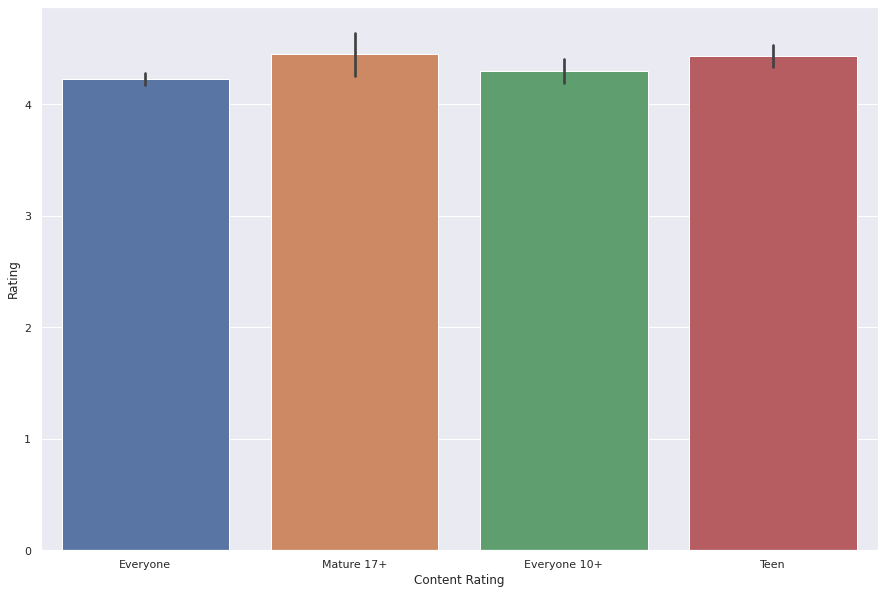

In [ ]:
# Make a bar plot displaying the rating for each content rating
sns.barplot(x="Content Rating", y="Rating",data=record_paid,estimator = mean)
sns.set(rc={'figure.figsize':(6,6)})

b. Which metric would you use ? Mean? Median ? Some other quantile?

i used the metric mean as the rating are only between the rangeof 1 and 5


7. Content Rating vs Size vs.rating - variable at a time

a. Create 5 buckets (20% records in each) based on size

In [ ]:
# maximum record in record_paid
record_paid["Size"].max()

100000000.0

In [ ]:
# minimum record in record_paid
record_paid["Size"].min()

14000.0

In [ ]:
# first bucket
size1=np.percentile(record_paid["Size"],20)
size1

2500000.0

In [ ]:
# second bucket
size2=np.percentile(record_paid["Size"],40)
size2

6500000.0

In [ ]:
# third buckets
size3 =np.percentile(record_paid["Size"],60)
size3

19000000.0

In [ ]:
# fourth buckets
size4 =np.percentile(record_paid["Size"],80)
size4

39000000.0

In [ ]:
# fifth buckets
size5=np.percentile(record_paid["Size"],100)
size5

100000000.0

In [ ]:
# interval of buckets
interval = [size1, size2, size3, size4,size5]
interval 

[2500000.0, 6500000.0, 19000000.0, 39000000.0, 100000000.0]

In [ ]:
interval_test =[]
for i in range(0,101,20):
  size =np.percentile(record_paid["Size"],i)
  interval_test.append(size)
print(interval_test)

[14000.0, 2500000.0, 6500000.0, 19000000.0, 39000000.0, 100000000.0]


In [ ]:
# create the size bucket
record_paid["size_Bucket"]=pd.cut(record_paid["Size"],interval_test,labels = ["very small","small","medium","large","very large"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# pivot table of size bucket
pd.pivot_table(record_paid,values = "Rating",index="size_Bucket",columns = "Content Rating").round(2)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size_Bucket,,,,
very small,4.08,4.40,NaN,5.00
small,4.23,4.10,NaN,4.32
medium,4.29,4.34,3.50,4.43
large,4.24,4.30,4.51,4.64
very large,4.33,4.36,4.54,4.36


b.By content rating vs size Buckets,get the rating (20th percentile) for each combination

In [ ]:
#By content rating vs size Buckets,get the rating (20th percentile) for each combination
table = pd.pivot_table(record_paid,values ="Rating",index = "size_Bucket",columns="Content Rating",aggfunc='mean')

In [ ]:
table

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
size_Bucket,,,,
very small,4.084071,4.40,NaN,5.000000
small,4.226923,4.10,NaN,4.325000
medium,4.286000,4.34,3.5000,4.433333
large,4.237647,4.30,4.5125,4.637500
very large,4.328571,4.36,4.5400,4.355556


c.Make a heatmap of this

i. Annotated

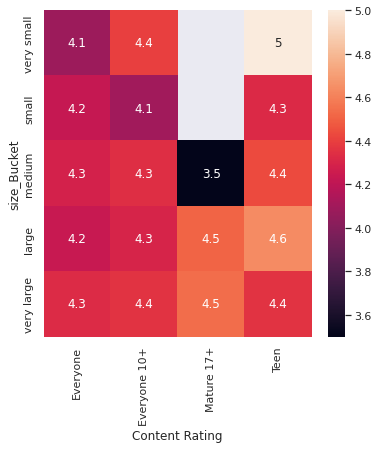

In [ ]:
# heatmap of table in annotated
sns.heatmap(table,annot = True)
sns.set(rc={'figure.figsize' : (6,6)})
plt.show()

ii.Greens Color Map

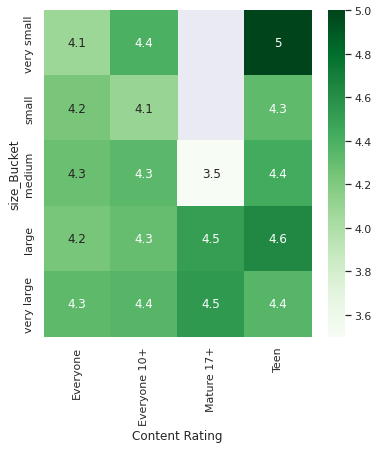

In [ ]:
# heatmap of table in green color map
sns.heatmap(table,annot = True,cmap='Greens')
sns.set(rc={'figure.figsize': (6,6)})
plt.show()

# Exploratory Analysis For Reviews

In [ ]:
# First 5 rows of datasets
review_path.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# find out the nan values in review path dataset  
print(review_path.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
# drop the nan values by using the dropna method
review = review_path.dropna()
review 

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
review ["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in review["Translated_Review"]]
review ["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in review["Translated_Review"]]
review ["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in review["Translated_Review"]]
print(review .head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                     App  ... Neutral
0  10 Best Foods for You  ...   0.466
1  10 Best Foods for You  ...   0.481
3  10 Best Foods for You  ...   0.549
4  10 Best Foods for You  ...   0.323
5  10 Best Foods for You  ...   0.192

[5 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


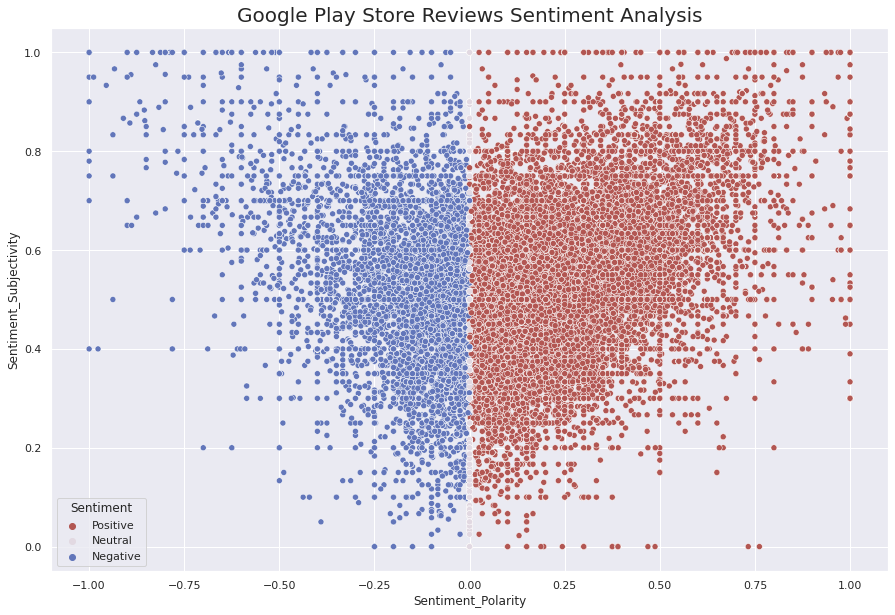

In [ ]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(review['Sentiment_Polarity'], review['Sentiment_Subjectivity'], 
                hue = review['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()